# test_audio

This notebook explores audio.

In [1]:
import pyaudio
import numpy as np
from matplotlib import pyplot

In [2]:
# get pyaudio input device
def getInputDevice(p):
    index = None
    nDevices = p.get_device_count()
    print('Found %d devices:' % nDevices)
    for i in range(nDevices):
        deviceInfo = p.get_device_info_by_index(i)
        print(deviceInfo)
        devName = deviceInfo['name']
        print(devName)
        # look for the "input" keyword
        # choose the first such device as input
        # change this loop to modify this behavior
        # maybe you want "mic"?
        if not index:
            if 'input' in devName.lower():
                index = i
    # print out chosen device
    if index is not None:
        devName = p.get_device_info_by_index(index)["name"]
        print("Input device chosen: %s" % devName)
    return index
# initialize pyaudio
p = pyaudio.PyAudio()
getInputDevice(p)

Found 9 devices:
{'index': 0, 'structVersion': 2, 'name': 'HDA NVidia: HDMI 0 (hw:0,3)', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 2, 'defaultLowInputLatency': -1.0, 'defaultLowOutputLatency': 0.005804988662131519, 'defaultHighInputLatency': -1.0, 'defaultHighOutputLatency': 0.034829931972789115, 'defaultSampleRate': 44100.0}
HDA NVidia: HDMI 0 (hw:0,3)
{'index': 1, 'structVersion': 2, 'name': 'HDA NVidia: HDMI 1 (hw:0,7)', 'hostApi': 0, 'maxInputChannels': 0, 'maxOutputChannels': 8, 'defaultLowInputLatency': -1.0, 'defaultLowOutputLatency': 0.005804988662131519, 'defaultHighInputLatency': -1.0, 'defaultHighOutputLatency': 0.034829931972789115, 'defaultSampleRate': 44100.0}
HDA NVidia: HDMI 1 (hw:0,7)
{'index': 2, 'structVersion': 2, 'name': 'HD-Audio Generic: ALC887-VD Analog (hw:1,0)', 'hostApi': 0, 'maxInputChannels': 2, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.005804988662131519, 'defaultLowOutputLatency': -1.0, 'defaultHighInputLatency': 0.03482993197278

In this case, this is our candidate:

```
{'index': 5, 'structVersion': 2, 'name': 'USB Device 0x46d:0x825: Audio (hw:2,0)', 'hostApi': 0, 'maxInputChannels': 1, 'maxOutputChannels': 0, 'defaultLowInputLatency': 0.007979166666666667, 'defaultLowOutputLatency': -1.0, 'defaultHighInputLatency': 0.032, 'defaultHighOutputLatency': -1.0, 'defaultSampleRate': 48000.0}
USB Device 0x46d:0x825: Audio (hw:2,0)
```

opening stream...
<class 'bytes'>
<class 'bytes'>
signal max: 23444.000000 RMS: 12.535716 abs: 4944.753563 


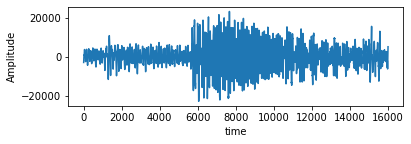

In [14]:
# set sample rate
NSEC = 1
sampleRate = 16000 # #48000
sampleLen = NSEC*sampleRate

print('opening stream...')
stream = p.open(format = pyaudio.paInt16,
                channels = 1,
                rate = sampleRate,
                input = True,
                frames_per_buffer = 4096,
                input_device_index = -1)
loop = True
first = True
while loop:
    # read a chunk of data - discard first
    data  = stream.read(sampleLen)
    print(type(data))
    if not first:
        f = open("test.bin", 'wb')
        f.write(data)
        f.close()
        loop = False
    first = False
p.close(stream)

def showAudio(fileName, N):
    f = open(fileName, 'rb')
    y = f.read()
    f.close()

    # audio data 
    x = range(N)
    y = np.frombuffer(y, np.int16)

    print("signal max: %f RMS: %f abs: %f " % (np.max(y), 
                                               np.sqrt(np.mean(y**2)), 
                                               np.mean(np.abs(y))))

    pyplot.title('Audio')

    # plot audio
    pyplot.subplot(2, 1, 1)
    pyplot.plot( x, y, '-' )
    pyplot.xlabel('time')
    pyplot.ylabel('Amplitude')
        
    pyplot.show()
    
showAudio('test.bin', sampleLen)